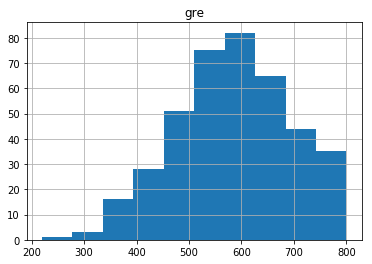

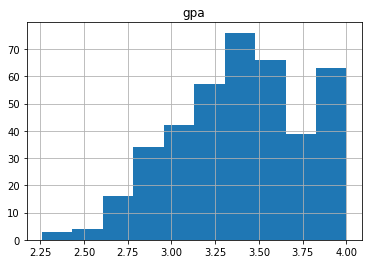

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline


df=pd.read_csv('data/grad.csv')


x=pd.crosstab(df['admit'], df['rank'])
df.hist('gre')
df.hist('gpa')

dff=df.groupby('rank').sum()
df2=df.groupby('rank').count()

dff['percentage']=(dff['admit']/len(df['admit'])*100)



In [4]:
dff


,admit,gre,gpa,percentage
rank,,,,
1,33,37320,210.64,8.25
2,54,90000,507.61,13.50
3,28,69560,415.38,7.00
4,12,38200,222.33,3.00


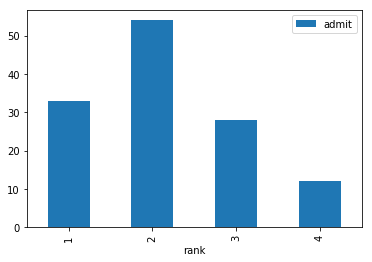

In [5]:
dff[['admit']].plot(kind='bar')

In [9]:
logit = sm.Logit(df['admit'], df[['gpa','gre']])
result = logit.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.629448
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Nov 2017   Pseudo R-squ.:               -0.007164
Time:                        17:25:14   Log-Likelihood:                -251.78
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gpa           -0.4823      0.175     -2.752      0.006      -0.826      -0.139
gre            0.0016      0.001      1.582      0.114      -0.000       0.003
==============================================================================
"""

In [7]:
(df['admit'].sum())/float(len(df['admit']))*100

31.75

In [18]:
X = df[['gpa','gre']]
y = df['admit']
y_pred = result.predict(X)

In [19]:
from sklearn.metrics import precision_recall_fscore_support

In [23]:
len(y_pred), len(y)

(400, 400)

In [25]:
y_pred

0      0.240986
1      0.323271
2      0.336438
3      0.368527
4      0.354200
5      0.435501
6      0.363027
7      0.297248
8      0.311907
9      0.310699
10     0.336438
11     0.296199
12     0.322633
13     0.403294
14     0.302497
15     0.287190
16     0.343495
17     0.338014
18     0.363862
19     0.270168
20     0.321341
21     0.327505
22     0.395895
23     0.383185
24     0.394549
25     0.373966
26     0.315974
27     0.270664
28     0.417196
29     0.315562
         ...   
370    0.273989
371    0.320617
372    0.473845
373    0.341505
374    0.279276
375    0.308274
376    0.313893
377    0.336438
378    0.376417
379    0.387350
380    0.339249
381    0.301651
382    0.299623
383    0.289477
384    0.374345
385    0.309970
386    0.330610
387    0.328658
388    0.370774
389    0.333396
390    0.444958
391    0.301523
392    0.333441
393    0.301566
394    0.230488
395    0.276795
396    0.356363
397    0.365937
398    0.339249
399    0.281181
Length: 400, dtype: floa

In [22]:
precision, recall, f1_score, support = precision_recall_fscore_support(y, y_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets